Raw X shape: (757, 200, 3)
Unique labels: ['normal' 'udrykning']
✔ Shape OK (N, 200, 3)
✔ Data normaliseret
Train: (605, 200, 3)
Test : (152, 200, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ separable_conv1d                │ (None, 200, 32)        │           143 │
│ (SeparableConv1D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv1d_1              │ (None, 100, 64)        │         2,272 │
│ (SeparableConv1D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv1d_2              │ (None, 50, 64)         │         4,352 │
│ (SeparableConv1D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,520 (37.19 KB)

 Trainable params: 9,200 (35.94 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7025 - loss: 0.6004 - val_accuracy: 0.5526 - val_loss: 0.6913
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7950 - loss: 0.4830 - val_accuracy: 0.5526 - val_loss: 0.6881
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8099 - loss: 0.4207 - val_accuracy: 0.5526 - val_loss: 0.6870
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8397 - loss: 0.3795 - val_accuracy: 0.5526 - val_loss: 0.6858
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8529 - loss: 0.3502 - val_accuracy: 0.5526 - val_loss: 0.6849
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8744 - loss: 0.3201 - val_accuracy: 0.5461 - val_loss: 0.6841
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8843 - loss: 0.2894 - val_accuracy: 0.5592 - val_loss: 0.6814
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8727 - loss: 0.2934 - val_accuracy: 0.5461 - v

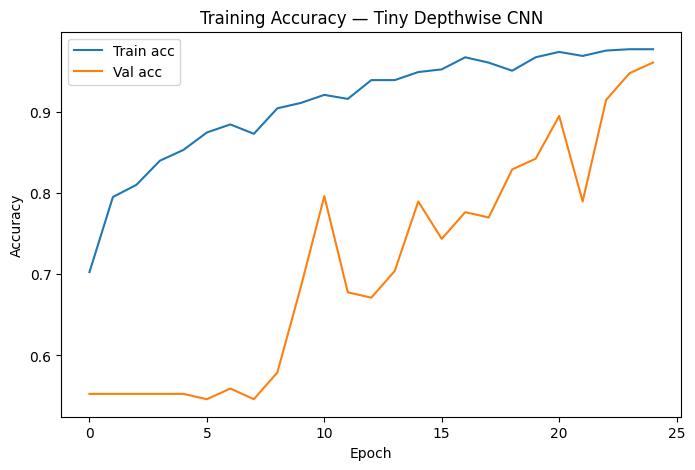

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 


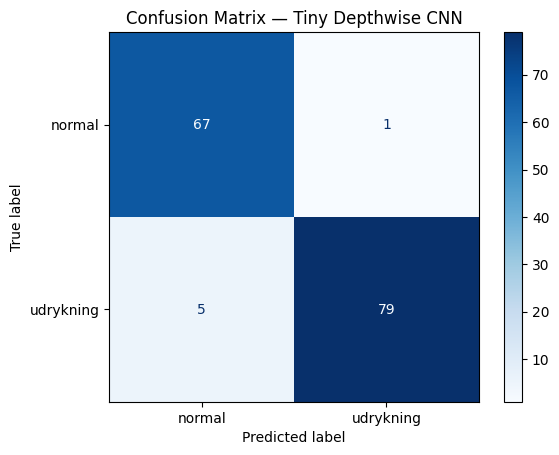

In [1]:
# ============================================================
# Tiny Depthwise CNN — SeparableConv1D model til accelerometer
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import layers, models

# ------------------------------------------------------------
# STEP 1 — Load data
# ------------------------------------------------------------
X = np.load("X_windows.npy")   # (N, 200, 3)
y = np.load("y_labels.npy")

print("Raw X shape:", X.shape)
print("Unique labels:", np.unique(y))

# Label encode
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Sanity check
assert len(X.shape) == 3, "X skal være 3D (samples, window, channels)"
assert X.shape[1] == 200, f"Vindueslængde skal være 200, men er {X.shape[1]}"
assert X.shape[2] == 3,   f"Der skal være 3 kanaler (x,y,z), men der er {X.shape[2]}"
print("✔ Shape OK (N, 200, 3)")

# ------------------------------------------------------------
# STEP 2 — Normalize data
# ------------------------------------------------------------
X = X.astype(np.float32)

X_mean = X.mean(axis=(0,1), keepdims=True)
X_std  = X.std(axis=(0,1), keepdims=True)
X = (X - X_mean) / (X_std + 1e-8)

print("✔ Data normaliseret")

# ------------------------------------------------------------
# STEP 3 — Train/test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)

# ------------------------------------------------------------
# STEP 4 — Tiny Depthwise CNN model (SeparableConv1D)
# ------------------------------------------------------------
model = models.Sequential([
    layers.Input(shape=(200, 3)),

    # Depthwise separable conv 1
    layers.SeparableConv1D(32, kernel_size=5, padding='same', activation='relu'),
    layers.BatchNormalization(),

    # Depthwise separable conv 2 (med stride = downsampling)
    layers.SeparableConv1D(64, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.BatchNormalization(),

    # Depthwise separable conv 3 (mere abstrakt repræsentation)
    layers.SeparableConv1D(64, kernel_size=3, strides=2, padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling1D(),

    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ------------------------------------------------------------
# STEP 5 — Train model
# ------------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=32,
    verbose=1
)

# ------------------------------------------------------------
# STEP 6 — Evaluate
# ------------------------------------------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("\nTEST ACCURACY (Tiny Depthwise CNN):", acc)

# Plot accuracy curves
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label="Train acc")
plt.plot(history.history['val_accuracy'], label="Val acc")
plt.title("Training Accuracy — Tiny Depthwise CNN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ------------------------------------------------------------
# STEP 7 — Confusion Matrix
# ------------------------------------------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=le.classes_,
    cmap="Blues"
)
plt.title("Confusion Matrix — Tiny Depthwise CNN")
plt.show()

In [2]:
# ============================================================
# INT8 QUANTIZATION FOR TINY DEPTHWISE CNN (TFLite Micro)
# ============================================================

import numpy as np
import tensorflow as tf
import pathlib

print("TensorFlow version:", tf.__version__)

# ------------------------------------------------------------
# 1. LAV REPRESENTATIVE DATASET FUNKTION
#    Denne funktion viser TFLite, hvordan dine data ser ud,
#    så quantization bliver korrekt (meget vigtigt!).
# ------------------------------------------------------------

def representative_dataset():
    # Brug ca. 200 tilfældige vinduer som repræsentativt datasæt
    for i in range(200):
        idx = np.random.randint(0, X_train.shape[0])
        data = X_train[idx:idx+1]  # form (1, 200, 3)
        yield [data.astype(np.float32)]

print("✔ Representative dataset klar")

# ------------------------------------------------------------
# 2. TFLite konverter med INT8 quantization
# ------------------------------------------------------------

converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Aktivér fuld INT8 quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Brug representative dataset
converter.representative_dataset = representative_dataset

# Tving både weights OG aktivationer til INT8
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Input/output skal også være INT8 (kræves af TFLite Micro)
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_model_int8 = converter.convert()

print("✔ Model quantized til INT8!")

# ------------------------------------------------------------
# 3. GEM MODEL SOM .TFLITE FIL
# ------------------------------------------------------------

output_path = pathlib.Path("tiny_depthwise_cnn_int8.tflite")
output_path.write_bytes(tflite_model_int8)

print("✔ INT8 model gemt som:", output_path)
print("Størrelse på INT8-model:", len(tflite_model_int8), "bytes")


TensorFlow version: 2.20.0
✔ Representative dataset klar
INFO:tensorflow:Assets written to: C:\Users\mikke\AppData\Local\Temp\tmp8g9tbuxa\assets


INFO:tensorflow:Assets written to: C:\Users\mikke\AppData\Local\Temp\tmp8g9tbuxa\assets


Saved artifact at 'C:\Users\mikke\AppData\Local\Temp\tmp8g9tbuxa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1992354325776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354325584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354327504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354326352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354326544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354326160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354327312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354327888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354327120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354328080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992354328

D:\Anaconda\Lib\site-packages\tensorflow\lite\python\convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


✔ Model quantized til INT8!
✔ INT8 model gemt som: tiny_depthwise_cnn_int8.tflite
Størrelse på INT8-model: 27768 bytes


In [3]:
# ============================================================
# CONVERT TFLITE MODEL TO C-ARRAY (model.cc) FOR TFLITE MICRO
# ============================================================

import numpy as np

input_tflite = "tiny_depthwise_cnn_int8.tflite"
output_cc = "model.cc"

# ------------------------------------------------------------
# 1. Load tflite model as bytes
# ------------------------------------------------------------
with open(input_tflite, "rb") as f:
    tflite_model = f.read()

model_len = len(tflite_model)
print("✔ Læst TFLite model, størrelse:", model_len, "bytes")

# ------------------------------------------------------------
# 2. Konverter til C-array
# ------------------------------------------------------------
c_array = ", ".join([str(b) for b in tflite_model])

cc_content = f"""
#include <cstddef>
#include <cstdint>

// Tiny Depthwise CNN — INT8 TFLite Micro model
// Auto-generated C array

const unsigned char model[] = {{
    {c_array}
}};

const int model_len = {model_len};
"""

# ------------------------------------------------------------
# 3. Gem som model.cc
# ------------------------------------------------------------
with open(output_cc, "w") as f:
    f.write(cc_content)

print("✔ model.cc genereret!")
print("Fil gemt som:", output_cc)

# ------------------------------------------------------------
# 4. Vis de første 300 bytes (eksempel)
# ------------------------------------------------------------
print("\\nUddrag af model.cc:")
print(cc_content[:300], " ...")


✔ Læst TFLite model, størrelse: 27768 bytes
✔ model.cc genereret!
Fil gemt som: model.cc
\nUddrag af model.cc:

#include <cstddef>
#include <cstdint>

// Tiny Depthwise CNN — INT8 TFLite Micro model
// Auto-generated C array

const unsigned char model[] = {
    32, 0, 0, 0, 84, 70, 76, 51, 0, 0, 0, 0, 20, 0, 32, 0, 28, 0, 24, 0, 20, 0, 16, 0, 12, 0, 0, 0, 8, 0, 4, 0, 20, 0, 0, 0, 28, 0, 0, 0, 140, 0, 0, 0, 2  ...


In [6]:
print("X_mean", X_mean)
print("X_std", X_std)

X_mean [[[ 0.97205466 -0.12377451  0.03551481]]]
X_std [[[0.06427786 0.10806434 0.09792679]]]
